In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
data=files.upload()

Saving Experimentation1.R to Experimentation1.R


In [4]:
data

{'Experimentation1.R': b'library(forecast)\r\nlibrary(ggplot2)\r\nlibrary(tseries)\r\nlibrary(quantmod)\r\ndata=read.csv(\'D:/Data Science/COMP 1252 Petrol Price/experimentation2.csv\')\r\nhead(data)\r\ndata1=ts(data$ULSP,frequency = 52,start = c(2003,1))\r\nplot(data1,ylab=\'Petrol Price\',xlab=\'Years\',main=\'Petrol price from 2003 to 2022\')\r\nadf.test(data1)\r\nk=(diff(data1,differences = 1))\r\nadf.test(k)\r\nacf(k)\r\npacf(k)\r\nAuto=auto.arima(data1,ic="aicc",trace=TRUE)\r\nAuto\r\naccuracy(Auto)\r\nacf(ts(Auto$residuals))\r\npacf(ts(Auto$residuals))\r\nFuture=forecast(Auto,level = c(99),h=5)\r\nFuture\r\nplot(Future,main = \'Forecast using ARIMA\',xlab=\'Years\',ylab=\'Petrol prices\')\r\n'}

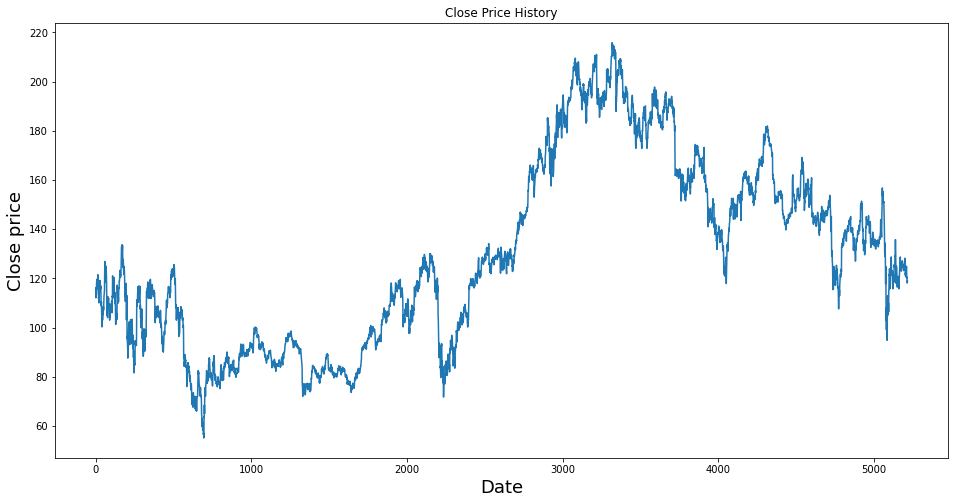

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price',fontsize=18)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
data=Scaler.fit_transform(np.array(df).reshape(-1,1))
data

array([[0.37908293],
       [0.35458532],
       [0.37908293],
       ...,
       [0.39669011],
       [0.39208607],
       [0.39743667]])

In [ ]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]
print(train_data)

[[0.37908293]
 [0.35458532]
 [0.37908293]
 ...
 [0.86150682]
 [0.87046596]
 [0.8697194 ]]


In [ ]:
def create_dataset(dataset,time_step=1):
    import numpy
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [ ]:
time_step=100
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
from keras.layers import Dense, LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=x_train.shape[1],batch_size=64,verbose=1)

Epoch 1/100
52/52 [==============================] - 12s 149ms/step - loss: 0.0178 - val_loss: 0.0019
Epoch 2/100
52/52 [==============================] - 7s 131ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 3/100
52/52 [==============================] - 7s 132ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 4/100
52/52 [==============================] - 7s 130ms/step - loss: 9.8550e-04 - val_loss: 0.0014
Epoch 5/100
52/52 [==============================] - 7s 132ms/step - loss: 9.4418e-04 - val_loss: 0.0014
Epoch 6/100
52/52 [==============================] - 7s 131ms/step - loss: 9.0441e-04 - val_loss: 0.0019
Epoch 7/100
52/52 [==============================] - 7s 130ms/step - loss: 8.7766e-04 - val_loss: 0.0011
Epoch 8/100
52/52 [==============================] - 8s 151ms/step - loss: 8.2189e-04 - val_loss: 0.0011
Epoch 9/100
52/52 [==============================] - 7s 131ms/step - loss: 7.5435e-04 - val_loss: 9.1204e-04
Epoch 10/100
52/52 [==============================] - 7s 131ms

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
train_predict=Scaler.inverse_transform(train_predict)
test_predict=Scaler.inverse_transform(test_predict)

In [ ]:
from keras.backend import mean
import math
from sklearn.metrics import mean_squared_error
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

121.67463265876786
151.972646919974


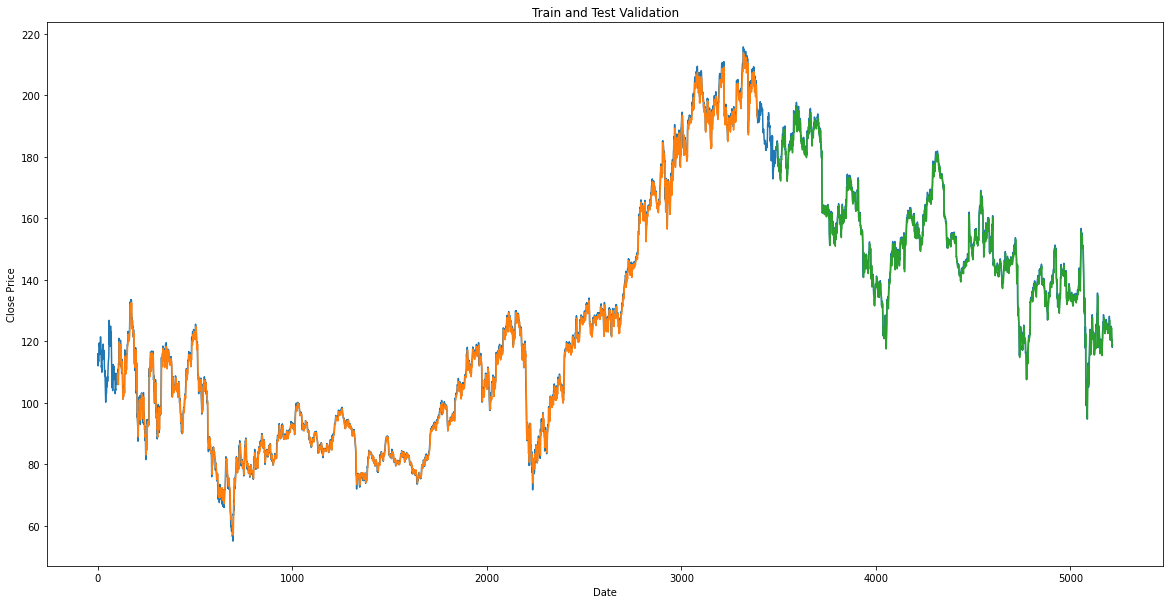

In [ ]:
import numpy as np
look_back=x_train.shape[1]
trainpredictplot=np.empty_like(data)
trainpredictplot[:,:]=np.nan
trainpredictplot[look_back:len(train_predict)+look_back,:]=train_predict
testpredictplot=np.empty_like(data)
testpredictplot[:,:]=np.nan
testpredictplot[len(train_predict)+(look_back*2)+1:len(data)-1,:]=test_predict
plt.figure(figsize=(20,10))
plt.title('Train and Test Validation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.plot(Scaler.inverse_transform(data))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.show()